In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("E Commerce Dataset.csv", sep=';')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


# **1. Statistical Descriptive**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [4]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [5]:
cats = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
nums = ['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

In [6]:
df[cats].describe()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [7]:
df[nums].describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [8]:
df['HourSpendOnApp'].value_counts()

3.0    2687
2.0    1471
4.0    1176
1.0      35
0.0       3
5.0       3
Name: HourSpendOnApp, dtype: int64

In [9]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom PreferredLoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Value count kolom PreferredPaymentMode:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Value count kolom Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64

Value count kolom PreferedOrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Value count kolom MaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64



1. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai? <br>
Kolom yang perlu diubah tipe datanya:
   - CustomerID → object
   - CityTier → Object
   - CouponUsed → Int64
   - DaySinceLastOrder → Int64
   - OrderCount → int64

2. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja? <br>
Terdapat beberapa kolom yang memiliki null value seperti: 
   - Tenure
   - WarehouseToHome
   - HourSpendOnApp
   - OrderAmountHikeFromlastYear
   - CouponUsed
   - OrderCount
   - DaySinceLastOrder
   - CashbackAmount
3. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq) <br>
  Terdapat beberapa kolom yang memiliki data yang agak aneh seperti:
   - WarehouseToHome, nilai mean (15.6) berbeda jauh dengan max (127)
   - NumberOfAddress, nilai mean (4.2) berbeda jauh dengan max (22)
   
  Terdapat beberapa kolom yang memiliki value yang mirip seperti:
   - PreferredPaymentMode, memiliki value yang mirip (COD dan Cash on Delivery) dan (CC dan Credit Card)
   - PreferedOrderCat, memiliki value yang mirip Phone dan Mobile Phone

# **2. Univariate Analysis**

In [10]:
cats = ['CustomerID', 'Churn', 'PreferredLoginDevice','CityTier',  'PreferredPaymentMode', 'Gender', 'PreferedOrderCat','Complain',  'MaritalStatus']
nums = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress','OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

Text(0.5, 1.05, 'Apakah ada outliers pada feature?')

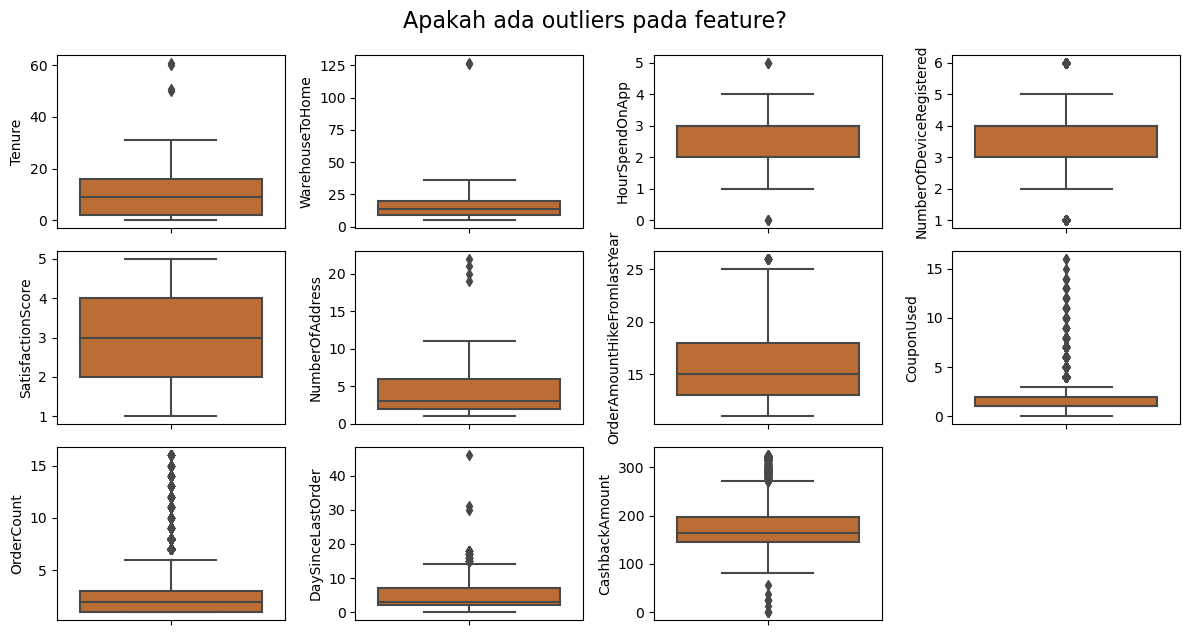

In [11]:
plt.figure(figsize=(12,6))
for i in range(0, len(nums)):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=df[nums[i]], color='chocolate')
    plt.tight_layout()
plt.suptitle('Apakah ada outliers pada feature?', y=1.05, size=16)

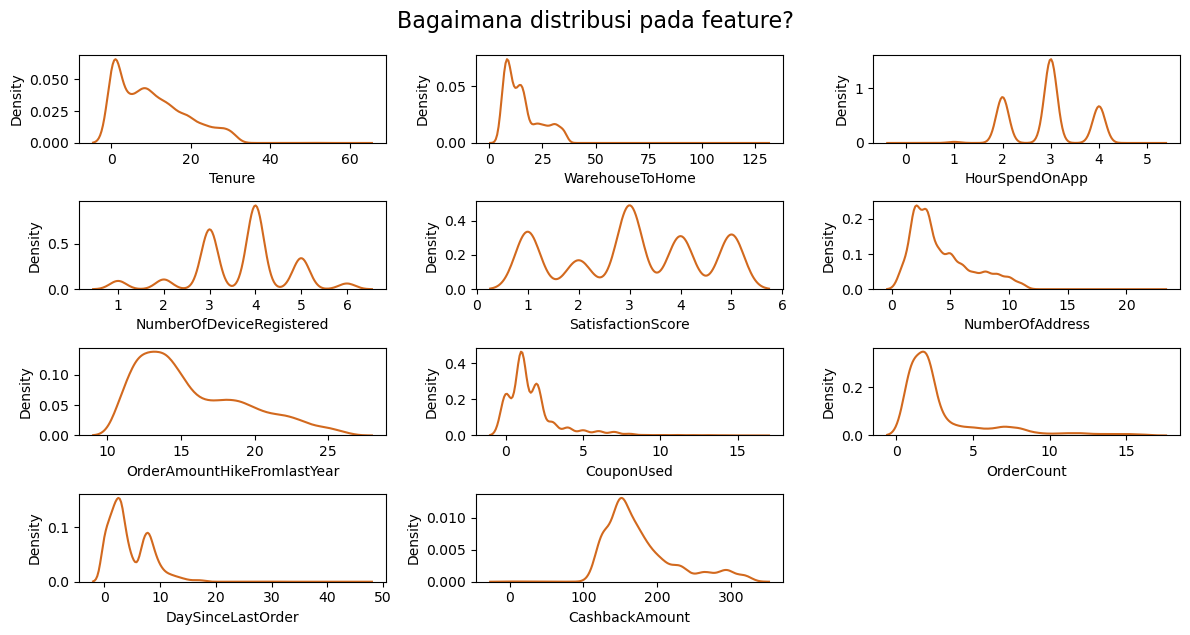

In [12]:
plt.figure(figsize=(12,6))
for i in range(0, len(nums)):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(x=df[nums[i]], color='chocolate')
    plt.tight_layout()
plt.suptitle('Bagaimana distribusi pada feature?', y=1.05, size=16)
plt.savefig('distribusi.png')

**Insight**:
- Terdapat beberapa feature yang memiliki distribusi right skew, seperti:
    - Tenure
    - WarehouseToHome
    - NumberOfAddress
    - OrderAmountHikeFromlastYear
    - CouponUsed
    - OrderCount
    - DaySinceLastOrder
- Terdapat beberapa feature yang memiliki bimodal, seperti HourSpendOnApp, NumberOfDeviceRegistered dan SatisfactionScore

Text(0.5, 1.05, 'Bagaimana distribusi pada feature?')

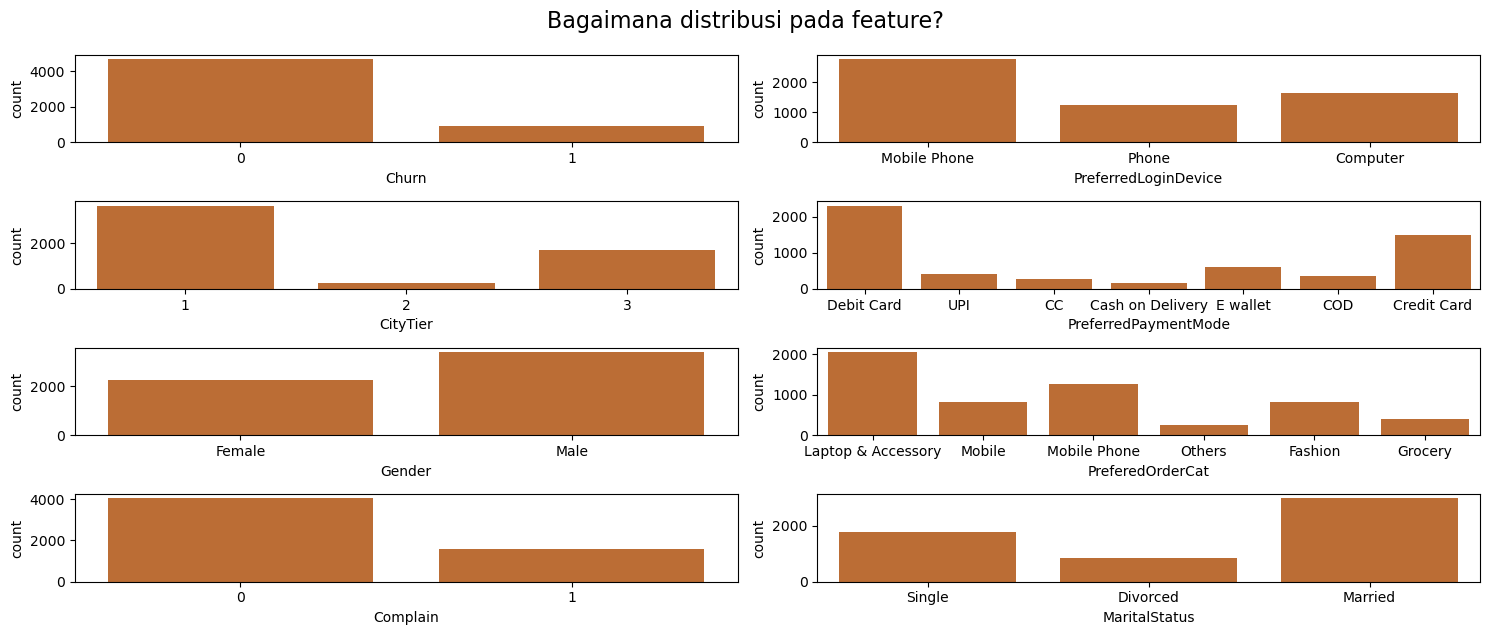

In [13]:
# kolom = ['Churn', 'PreferredLoginDevice','CityTier',  'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'PreferedOrderCat','Complain',  'MaritalStatus']
plt.figure(figsize=(15,6))
for i in range(0, len(cats[1:])):
    plt.subplot(4, 2, i+1)
    sns.countplot(df[cats[1:][i]], color='chocolate')
    plt.tight_layout()
plt.suptitle('Bagaimana distribusi pada feature?', y=1.05, size=16)

**Insight:**
1. Hampir keseluruhan feature memiliki nilai outliers kecuali SatisfactionScore
2. Terdapat beberapa feature yang memiliki distribusi right skew, seperti:
   - Tenure
   - WarehouseToHome
   - NumberOfAddress
   - OrderAmountHikeFromlastYear
   - CouponUsed
   - OrderCount
   - DaySinceLastOrder
3. Terdapat beberapa feature yang memiliki bimodal, seperti HourSpendOnApp, NumberOfDeviceRegistered dan SatisfactionScore
4. Pada feature kategorikal terdapat beberapa kategori memiliki pengertian yang sama seperti:
    - PreferredLoginDevice (Mobile Phone - Phone)
    - PreferredPaymentMethod (Cash on Delivery - COD)
    - PreferredOrderCat (Mobile - Mobile Phone)


# **3. Multivariate Analysis**

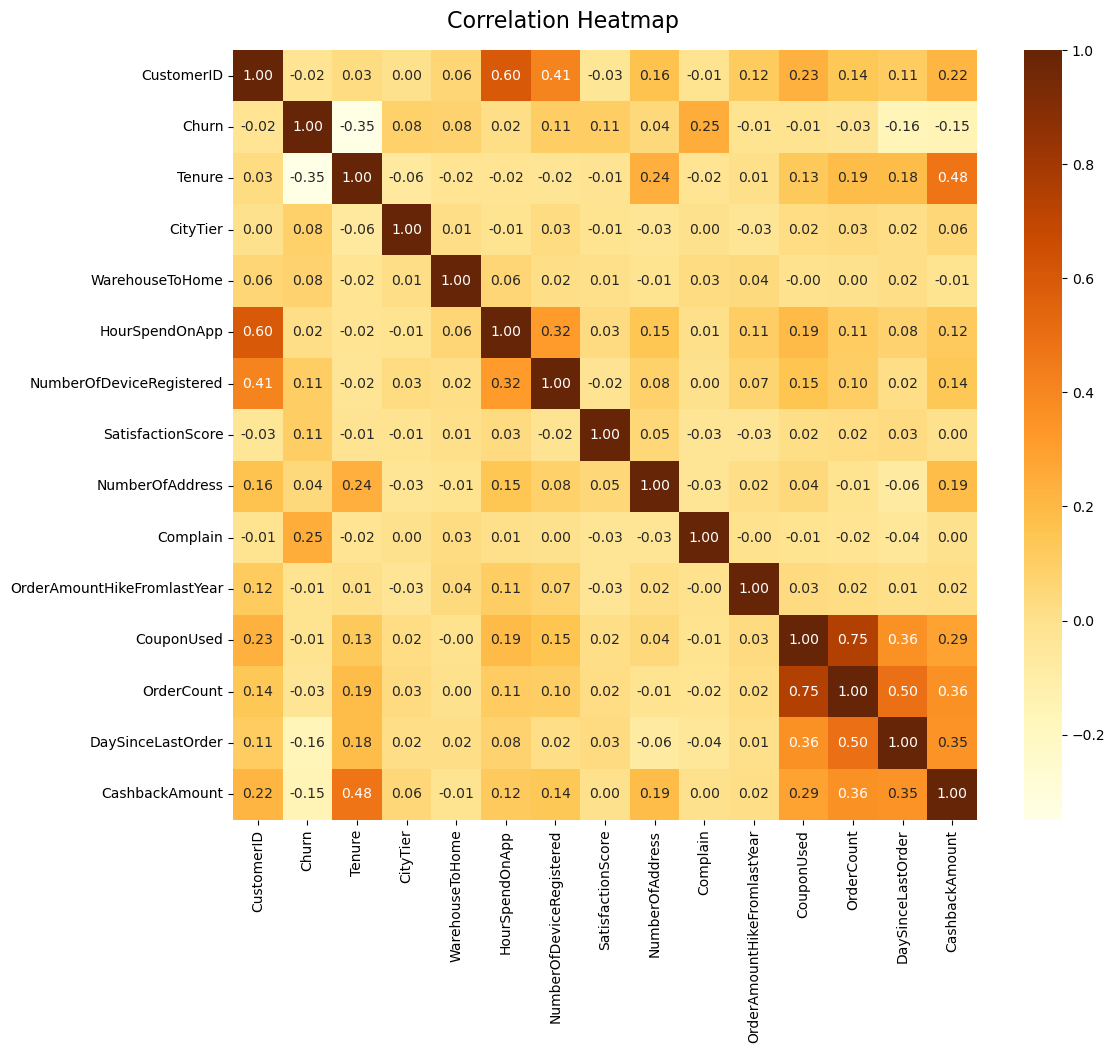

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='YlOrBr', annot=True, fmt='.2f')
plt.suptitle('Correlation Heatmap',x=0.4, y=0.92, size=16)
plt.savefig('heatmap.png')

In [15]:
def churn_plot(x):
    df_cats = df.copy()
    df_city = df_cats.groupby(x)['CustomerID'].nunique().reset_index(name='Total')
    df_churn =  df_cats.groupby([x, 'Churn'])['CustomerID'].nunique().reset_index(name='TotalCustomer')
    df_merge = df_churn.merge(df_city, on=x)
    df_merge['Percentage'] = round(df_merge['TotalCustomer']/df_merge['Total']*100,2)
    
    return df_merge

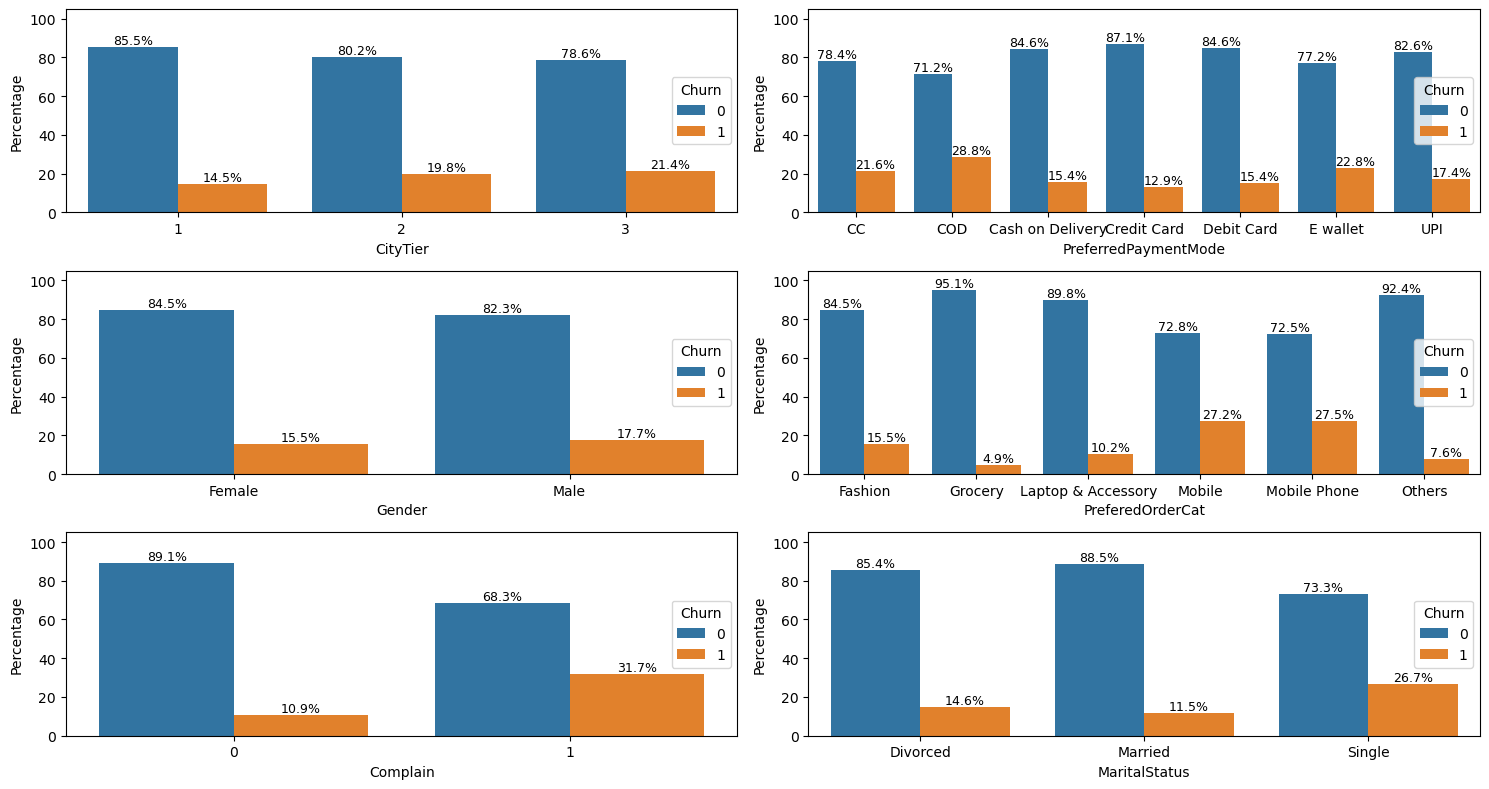

In [16]:
kolom = cats[3:]#['CityTier', 'Gender', 'MaritalStatus', 'Complain']
plt.figure(figsize=(15,8))
for i in range(0, len(kolom)):
    # print(cats[7:][i])
    plt.subplot(3, 2, i+1)
    data = churn_plot(kolom[i])
    # plt.figure(figsize=(10,8))
    ax = sns.barplot(x=kolom[i], y='Percentage', data=data, hue = 'Churn')

    for container in ax.containers:
        ax.bar_label(container, fontsize=9, fmt='%.1f%%')
        ax.set_ylim(top=105)
        ax.legend(loc='center right', title='Churn')
    plt.tight_layout()
plt.savefig('Churn Category.png')

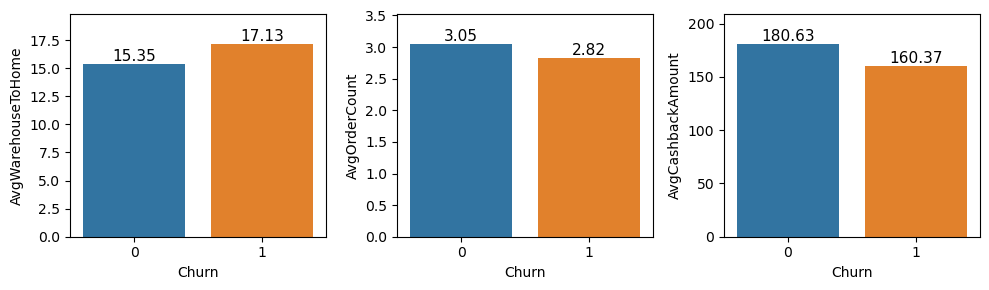

In [17]:
kolom = ['WarehouseToHome', 'OrderCount', 'CashbackAmount']
plt.figure(figsize=(10,3))
for i in range(0, len(kolom)):
    # print(cats[7:][i])
    plt.subplot(1, 3, i+1)
    data = df.copy()
    # name = 'Avg'+ kolom
    data = data.groupby('Churn')[kolom[i]].mean().reset_index(name='Avg'+ kolom[i])
    ax = sns.barplot(x='Churn', y='Avg'+kolom[i], data=data)

    for container in ax.containers:
        ax.bar_label(container, fontsize=11, fmt='%.2f')
        ax.set_ylim(top=ax.get_ylim()[1]*1.1)
        # ax.legend(loc='center right')
    plt.tight_layout()
plt.savefig('Churn Numerical.png')

# Business Insight

**1. Pelanggan banyak melakukan churn pada saat tenure berapa bulan?**

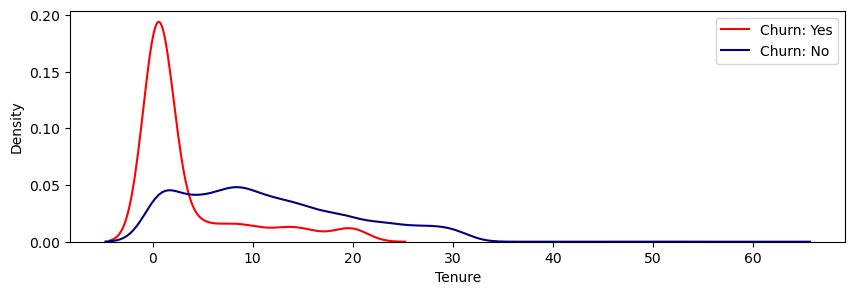

In [18]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.kdeplot(df[df['Churn'] == 1]['Tenure'].dropna(), color= 'red', label= 'Churn: Yes', ax=ax)
sns.kdeplot(df[df['Churn'] == 0]['Tenure'].dropna(), color= 'navy', label= 'Churn: No', ax=ax)
plt.legend(loc = 1)

**Insight:** 
<br>
<br>
Dari grafik diatas dapat kita ketahui bahwa Customer akan Churn pada bulan-bulan awal memakai platform E-Commerce. Pada Heatmap juga memiliki skor -0.35, yang berarti bahwa semakin lama masa berlangganan maka semakin sedikit pula kemungkinan Customer untuk Churn. Rekomendasi untuk bisnis adalah, pada saat bulan-bulan awal perlu dilakukan langkah-langkah konkret untuk mempertahankan Customer agar tetap melakukan transaksi di E-Commerce PT. Numero Uno salah satunya adalah Pemberian Cashback (sebagaimana angka yang ditunjukan di heatmap, korelasi antara tenure dengan cashbackamount adalah 0.48)

**2. Pelanggan banyak melakukan churn pada kategori apa?**

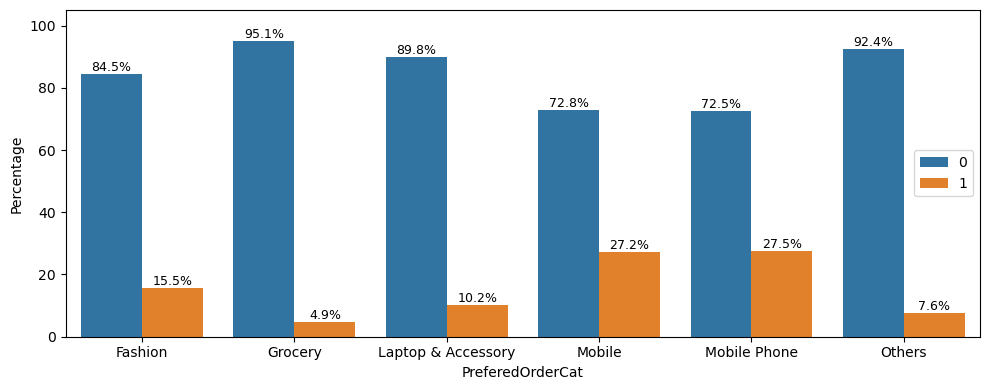

In [20]:
kolom = 'PreferedOrderCat'#['CityTier', 'Gender', 'MaritalStatus', 'Complain']
plt.figure(figsize=(10,4))
# for i in range(0, len(kolom)):
    # print(cats[7:][i])
    # plt.subplot(3, 2, i+1)
data = churn_plot(kolom)
# plt.figure(figsize=(10,8))
ax = sns.barplot(x=kolom, y='Percentage', data=data, hue = 'Churn')

for container in ax.containers:
    ax.bar_label(container, fontsize=9, fmt='%.1f%%')
    ax.set_ylim(top=105)
    ax.legend(loc='center right')
plt.tight_layout()
plt.savefig('Churn Order Category.png')

**Insight:** 
<br>
<br>
Dari grafik diatas dapat diketahui bahwa customer yang melakukan transaksi pada kategori Mobile dan Mobile Phone memiliki kemungkinan Churn yang tertinggi dengan persentase lebih dari 27%. Oleh karenanya kami menyarankan untuk meninjau kembali kualitas produk yang ditawarkan pada kedua kategori tersebut.

**3. Pelanggan banyak melakukan churn pada metode transaksi apa?**

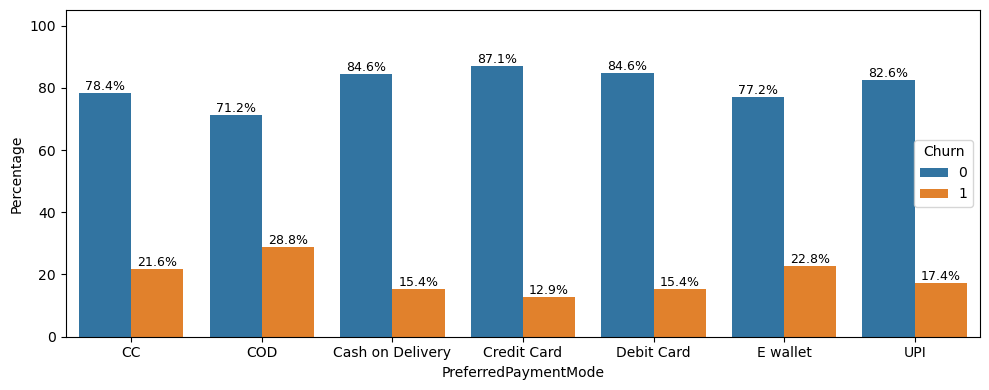

In [19]:
kolom = 'PreferredPaymentMode'#['CityTier', 'Gender', 'MaritalStatus', 'Complain']
plt.figure(figsize=(10,4))
# for i in range(0, len(kolom)):
    # print(cats[7:][i])
    # plt.subplot(3, 2, i+1)
data = churn_plot(kolom)
# plt.figure(figsize=(10,8))
ax = sns.barplot(x=kolom, y='Percentage', data=data, hue = 'Churn')

for container in ax.containers:
    ax.bar_label(container, fontsize=9, fmt='%.1f%%')
    ax.set_ylim(top=105)
    ax.legend(loc=7, title='Churn')
plt.tight_layout()
plt.savefig('Churn Payment Method.png')

**Insight:**
<br>
<br>
Dari grafik diatas dapat diketahui bahwa customer yang melakukan transaksi menggunakan metode COD memiliki kemungkinan Churn yang tertinggi dengan persentase 28.8%. Oleh karenanya kami menyarankan untuk meninjau kembali kualitas pelayanan pada metode pembayaran tersebut.

**4. Pelanggan banyak melakukan churn pada saat jumlah complainnya berapa?**

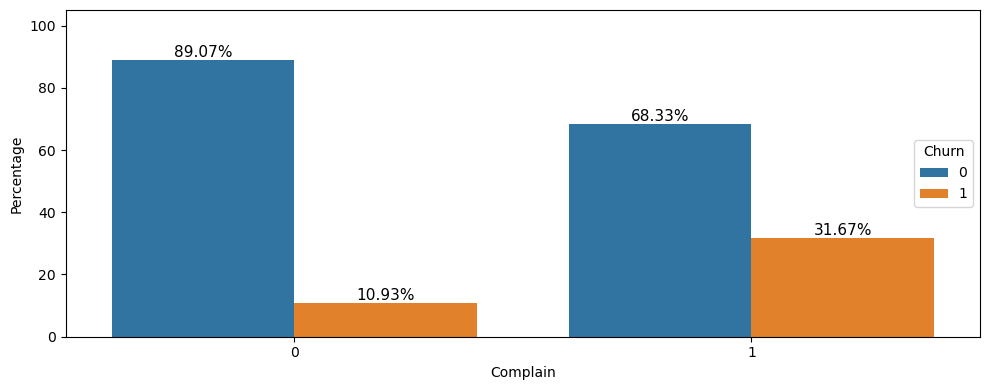

In [21]:
plt.figure(figsize=(10,4))
    # print(cats[7:][i])
    # plt.subplot(2, 2, i+1)
data = churn_plot('Complain')
# plt.figure(figsize=(10,8))
ax = sns.barplot(x='Complain', y='Percentage', data=data, hue = 'Churn')

for container in ax.containers:
    ax.bar_label(container, fontsize=11, fmt='%.2f%%')
    ax.set_ylim(top=105)
    ax.legend(loc=7, title='Churn')
plt.tight_layout()
plt.savefig('Churn Complain.png')

**Insight:**
<br>
<br>
Dari grafik di atas dapat diketahui bahwa Complain banyak dilakukan oleh customer yang Churn sehingga customer yang Complain memiliki kemungkinan yang tinggi untuk Churn yakni sebesar 31.67%. Pada Heatmap juga memiliki korelasi sebesar 0.25, yang berarti bahwa semakin tinggi Jumlah Complain maka semakin tinggi pula kemungkinan Customer untuk Churn. Kami menyarankan untuk mengelompokkan jenis complain yang diterima sehingga dapat memberikan keputusan lebih bijak sesuai dengan kategori complain. Selain itu, kami juga menyarankan untuk meningkatkan kualitas pelayanan ecommerce agar complain menurun dan customer yang churn menurun.